In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('car_price_data2.csv')

In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df['Car_age']=2021-df['Year']

In [6]:
df.drop(labels='Year',axis=1,inplace=True )

In [7]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


##### Dealing with categorical variables

In [8]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [9]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [10]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [12]:
df = df.drop(labels='Car_Name',axis=1)

In [13]:
clean_data=pd.get_dummies(df,drop_first=True)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


##### checking multicollinearity using VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   #lib.pckg.module
variables=clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,3.204463,Present_Price
1,2.892740,Kms_Driven
2,1.087681,Owner
3,10.831000,Car_age
4,4.891105,Fuel_Type_Diesel
5,14.342446,Fuel_Type_Petrol
6,2.230725,Seller_Type_Individual
7,8.392371,Transmission_Manual


In [15]:
data_no_multicollinearity=clean_data.drop('Fuel_Type_Petrol',axis=1)

In [16]:
variables=clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,2.544336,Present_Price
1,2.886452,Kms_Driven
2,1.082447,Owner
3,8.713539,Car_age
4,1.706132,Fuel_Type_Diesel
5,1.904835,Seller_Type_Individual
6,4.666095,Transmission_Manual


In [17]:
data_no_multicollinearity=clean_data.drop('Car_age',axis=1)

In [18]:
variables=clean_data[['Present_Price','Kms_Driven','Owner','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,2.200428,Present_Price
1,1.883557,Kms_Driven
2,1.065887,Owner
3,1.669188,Fuel_Type_Diesel
4,1.748669,Seller_Type_Individual
5,2.465705,Transmission_Manual


In [19]:
data_no_multicollinearity.drop(labels='Fuel_Type_Petrol',axis=1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,0,1
1,4.75,9.54,43000,0,1,0,1
2,7.25,9.85,6900,0,0,0,1
3,2.85,4.15,5200,0,0,0,1
4,4.60,6.87,42450,0,1,0,1
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,1
297,4.00,5.90,60000,0,0,0,1
298,3.35,11.00,87934,0,0,0,1
299,11.50,12.50,9000,0,1,0,1


In [20]:
x=data_no_multicollinearity.drop('Selling_Price',axis=1)

In [21]:
y=data_no_multicollinearity['Selling_Price']

##### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x[['Present_Price','Kms_Driven']])         #column inside column [[multiple columns]]

StandardScaler()

##### Training and Testing

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

##### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [25]:
y_pred

array([ 6.88964206,  0.96164601,  3.88984693,  8.36915728, 14.02105143,
        4.39441057,  4.13182723,  0.94941662,  6.05140004,  5.19658685,
        3.47598139,  1.1263384 ,  3.98364301,  7.71311028,  7.84649064,
       13.29880406,  7.11197167,  4.01657233,  0.56173689,  1.47029759,
        6.18974754,  2.776493  ,  7.05249176,  7.22235454, -0.1797864 ,
        0.98802991, -0.47264098,  0.75781258,  0.8861119 ,  8.70752758,
        4.32302694,  7.37294654,  0.63949642,  7.52199065,  4.7588688 ,
        1.18695626,  4.90138059,  6.68329541, -1.02977555,  8.77280008,
        8.28768365, 20.23172023,  4.30469526,  2.70694603,  6.66802818,
        9.16239515,  0.36592768,  1.10496168,  5.03205302,  7.13496559,
        8.58800249,  3.61101905,  4.70045817, 20.10841249,  0.99582927,
        0.81892049,  0.73988511,  2.69648666,  3.33467925,  0.29032312,
        6.18858764])

In [26]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
r_squared=r2_score(y_test,y_pred)

In [29]:
r_squared

0.8795077661641192

In [30]:
mse=mean_squared_error(y_test,y_pred)

In [31]:
mse

3.045720579913846

##### DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dr=DecisionTreeRegressor(random_state=0)
dr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [33]:
y_pred1=dr.predict(x_test)
y_pred1

array([ 4.95 ,  0.4  ,  4.4  ,  7.25 , 14.25 ,  5.3  ,  2.9  ,  0.25 ,
        5.15 ,  5.225,  2.   ,  0.9  ,  4.85 ,  6.7  ,  7.75 , 14.25 ,
        6.4  ,  3.45 ,  0.45 ,  1.65 ,  2.1  ,  4.9  ,  5.225,  9.7  ,
        0.2  ,  0.4  ,  0.2  ,  0.45 ,  0.45 ,  3.8  ,  3.9  ,  5.95 ,
        0.45 ,  6.5  ,  4.1  ,  1.05 ,  6.25 ,  2.65 ,  0.2  , 11.25 ,
        7.25 , 23.   ,  4.9  ,  4.4  ,  5.5  ,  8.4  ,  0.5  ,  0.4  ,
        5.   ,  7.75 ,  8.99 ,  3.1  ,  5.   , 23.   ,  1.25 ,  1.1  ,
        0.55 ,  2.9  ,  4.   ,  3.   ,  5.5  ])

In [34]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [35]:
r_squared=r2_score(y_test,y_pred1)
r_squared

0.9079354451502754

In [36]:
mse=mean_squared_error(y_test,y_pred1)
mse

2.3271450819672133

[Text(484.4055118110236, 365.88461538461536, 'X[0] <= 7.775\nmse = 18.779\nsamples = 61\nvalue = 4.944'),
 Text(265.2696850393701, 336.6138461538461, 'X[0] <= 3.94\nmse = 3.157\nsamples = 34\nvalue = 2.081'),
 Text(187.8307086614173, 307.3430769230769, 'X[1] <= 25500.0\nmse = 0.363\nsamples = 19\nvalue = 0.64'),
 Text(125.22047244094487, 278.0723076923077, 'X[1] <= 10850.0\nmse = 0.077\nsamples = 13\nvalue = 0.931'),
 Text(79.08661417322834, 248.80153846153846, 'X[0] <= 1.66\nmse = 0.028\nsamples = 7\nvalue = 1.113'),
 Text(65.90551181102362, 219.5307692307692, 'X[0] <= 0.895\nmse = 0.008\nsamples = 6\nvalue = 1.053'),
 Text(39.54330708661417, 190.26, 'X[0] <= 0.833\nmse = 0.0\nsamples = 3\nvalue = 0.966'),
 Text(26.362204724409448, 160.98923076923077, 'X[0] <= 0.688\nmse = 0.0\nsamples = 2\nvalue = 0.956'),
 Text(13.181102362204724, 131.71846153846153, 'mse = 0.0\nsamples = 1\nvalue = 0.949'),
 Text(39.54330708661417, 131.71846153846153, 'mse = 0.0\nsamples = 1\nvalue = 0.962'),
 Text

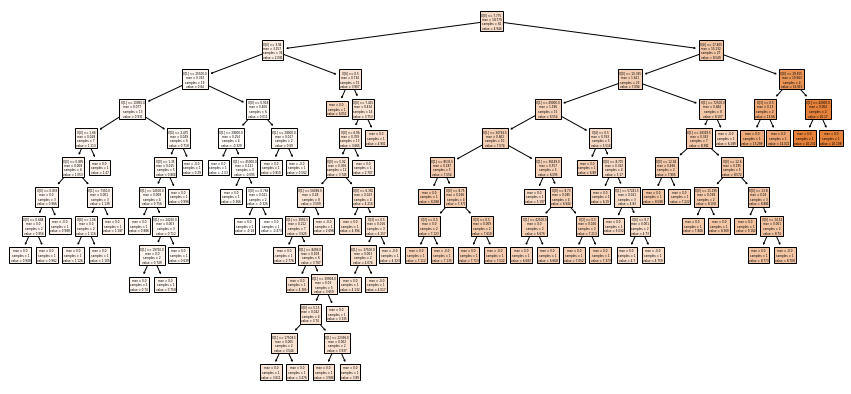

In [37]:
df=dr.fit(x_test,y_pred)
plt.figure(figsize=(15,7))
plot_tree(df,filled=True)

##### RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [39]:
y_pred

array([ 5.0355    ,  0.529     ,  4.4845    ,  7.688     , 14.001     ,
        4.8445    ,  3.6145    ,  0.395125  ,  4.383     ,  5.45161667,
        2.6785    ,  0.827     ,  4.6285    ,  7.9265    ,  7.3965    ,
       13.1539    ,  6.889     ,  3.7585    ,  0.4809    ,  1.601     ,
        3.4975    ,  4.741     ,  5.92385833,  9.6368    ,  0.2121    ,
        0.5926    ,  0.2622    ,  0.7144    ,  0.53      ,  5.555     ,
        3.5585    ,  5.6855    ,  0.4879    ,  6.9925    ,  4.3375    ,
        1.1075    ,  5.93      ,  4.55725   ,  0.2978    ,  8.989     ,
        7.6322    , 24.9675    ,  4.805     ,  4.291125  ,  5.72      ,
       11.5051    ,  0.3223    ,  0.7271    ,  4.7865    ,  6.305     ,
        8.8559    ,  3.034     ,  4.7245    , 25.025     ,  1.1497    ,
        1.1116    ,  0.55816667,  2.825     ,  3.288     ,  2.6535    ,
        5.5489    ])

In [40]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [41]:
r_squared=r2_score(y_test,y_pred)

In [42]:
r_squared

0.9125166020002338

In [43]:
mse=mean_squared_error(y_test,y_pred)
mse

2.2113457208504097